[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
I_0: 1.739787104311013 +- 0.01030471210943812
eta: -0.8410405532241906 +- 0.009783445224983044
xi: -0.3382117968912418 +- 0.008534093269514098


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_38943/480562018.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.')


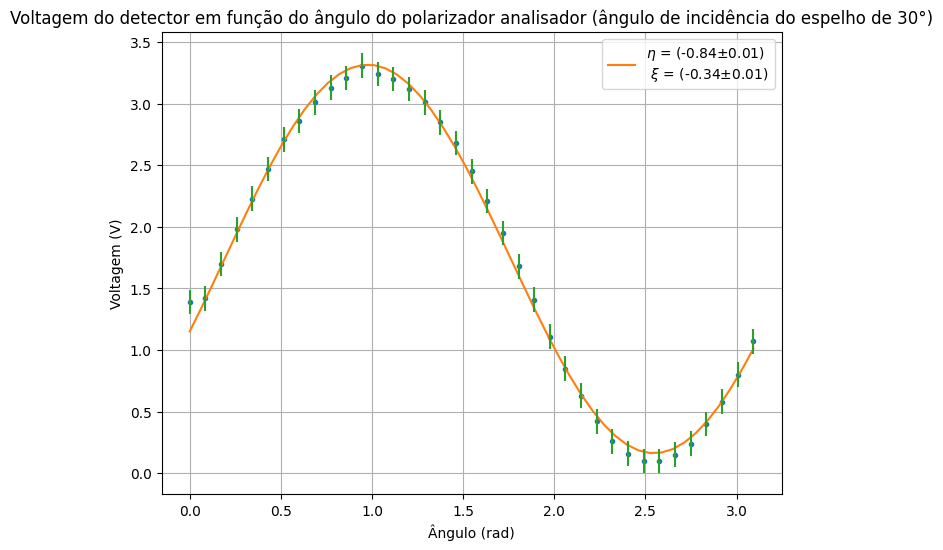

In [5]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados30.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []
for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)
i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr
print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + r"$\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)))
    grafico.errorbar(xData, yData, yerr = Dy, ls='None')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 30°)') #título
    grafico.legend(loc = 'upper right')

    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_38943/135591382.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.')


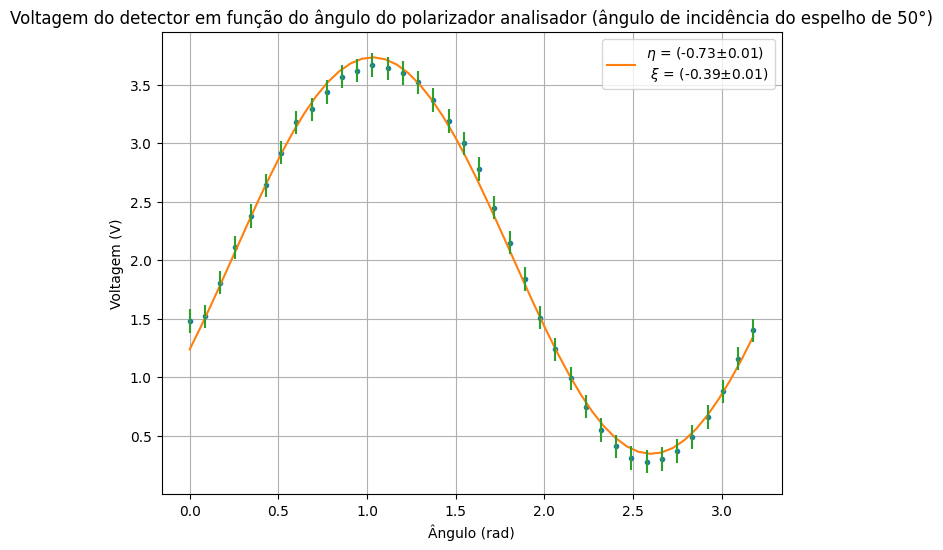

In [6]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados50.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []
for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)
i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + r"$\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)))
    grafico.errorbar(xData, yData, yerr = Dy, ls='None')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 50°)') #título
    grafico.legend(loc = 'upper right')

    plt.show()
    plt.close('all')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

I_0: 1.754154772313978 +- 0.0063171113858152385
eta: -0.38674309027944076 +- 0.005369960126089354
xi: -0.4374825620506843 +- 0.0051639809332941905


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_38943/4290225861.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.')


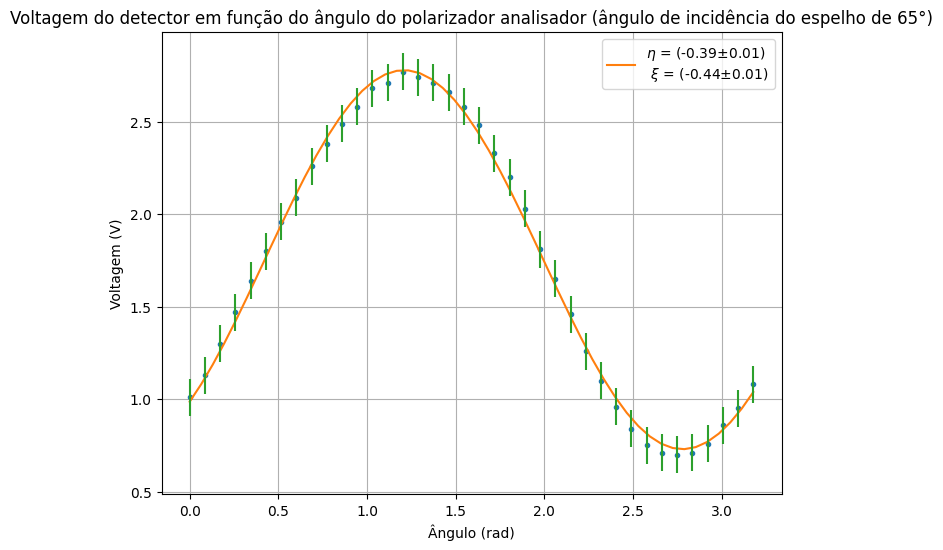

In [7]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados65.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []
for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)
i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr
print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)


def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + r"$\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)))
    grafico.errorbar(xData, yData, yerr = Dy, ls='None')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 65°)') #título
    grafico.legend(loc = 'upper right')

    plt.show()
    plt.close('all')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)